# AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [27]:
df = pd.read_csv('./dataset/users_df_with_my_bot_indicator.csv', lineterminator='\n')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                11109 non-null  int64  
 1   user_id                                   11109 non-null  int64  
 2   name                                      11108 non-null  object 
 3   lang                                      11109 non-null  object 
 4   bot                                       11109 non-null  int64  
 5   created_at                                11109 non-null  object 
 6   statuses_count                            11109 non-null  int64  
 7   account_age_in_days                       11109 non-null  int64  
 8   number_of_tweets                          11109 non-null  int64  
 9   account_average_tweets_per_day            11109 non-null  float64
 10  avg_tweets_per_actual_day         

In [28]:
var = sorted(df['lang'].unique())
mapping = dict(zip(var, range(0, len(var) + 1)))
df['lang_num'] = df['lang'].map(mapping).astype(int)
df.drop(columns='lang', inplace=True)

df

,Unnamed: 0,user_id,name,bot,created_at,statuses_count,account_age_in_days,number_of_tweets,account_average_tweets_per_day,avg_tweets_per_actual_day,...,tweet_num_likes_ratio,tweet_num_replies_ratio,entropy_original_text,entropy_text,mean_inactive_period_length_in_seconds,median_inactive_period_length_in_seconds,mode_inactive_period_length_in_seconds,mode_count,my_bot,lang_num
0,0,2353593986,Lamonica Raborn,1,2019-02-22 18:00:42,76,1314,126,0.057839,4.666667,...,25.200000,0.0,6.850296,1.617447e-06,1.099118e+05,24.5,0.0,8,1,5
1,1,2358850842,Lourie Botton,0,2019-02-26 03:02:32,54,1311,116,0.041190,4.640000,...,19.333333,0.0,6.651084,1.323339e-06,1.170971e+05,22.0,0.0,12,0,5
2,2,137959629,Dadan Syarifudin,1,2015-04-30 07:09:56,3,2709,4,0.001107,2.000000,...,0.000000,0.0,1.500000,2.029541e-07,8.816991e+06,32322.0,0.0,1,1,5
3,3,466124818,Carletto Focia,1,2017-01-18 02:49:18,50,2080,1358,0.024038,8.035503,...,5.388889,0.0,10.153175,2.167859e-05,6.557065e+04,3327.0,0.0,109,2,12
4,4,2571493866,MBK Ebook,0,2019-06-18 19:30:21,7085,1198,3434,5.914023,28.380165,...,16.122066,0.0,11.420705,2.582894e-07,8.020619e+03,2090.5,7200.0,322,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11104,11104,2911861962,Madrid Lae Maika .,0,2019-11-29 13:16:02,1126,1034,1051,1.088975,11.677778,...,17.516667,0.0,9.853332,4.330775e-07,1.275382e+04,194.0,0.0,90,0,5
11105,11105,1378532629,Clau Sato,0,2018-04-27 03:01:58,3024,1616,1975,1.871287,7.397004,...,4.571759,0.0,10.782191,2.912676e-07,3.207934e+04,339.0,0.0,159,0,5
11106,11106,126984069,ALMA LETICIA NUÑO,0,2015-03-29 17:01:24,6,2740,6,0.002190,1.500000,...,0.000000,0.0,2.584963,1.444719e-07,1.388741e+07,4810985.5,37.0,1,0,8
11107,11107,2383025796,Minnie Guadagno,1,2019-03-13 02:44:13,42,1296,99,0.032407,4.304348,...,11.000000,0.0,6.467740,1.330330e-06,1.253698e+05,21.0,0.0,8,1,5


In [29]:
df = df[df.columns.difference(['user_id', 'name', 'created_at', 'day_with_most_tweets'])]
label = df.pop('bot')
df.pop('my_bot')
df.pop('Unnamed: 0')
train_set, test_set, train_label, test_label = train_test_split(df, label, shuffle=True, test_size=0.30)

In [30]:
clf = AdaBoostClassifier()
clf.fit(train_set, train_label)

AdaBoostClassifier()

In [31]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1495
           1       0.80      0.96      0.87      1838

    accuracy                           0.84      3333
   macro avg       0.87      0.83      0.84      3333
weighted avg       0.86      0.84      0.84      3333



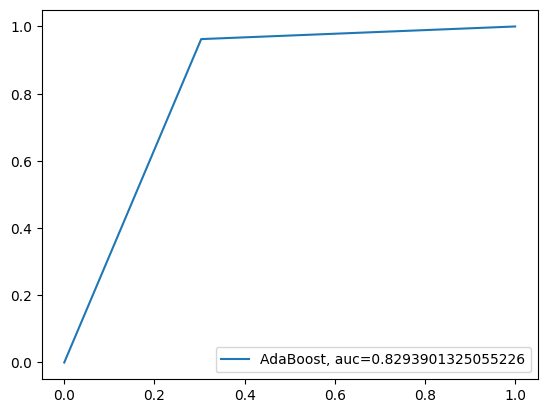

In [32]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

/home/paul/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


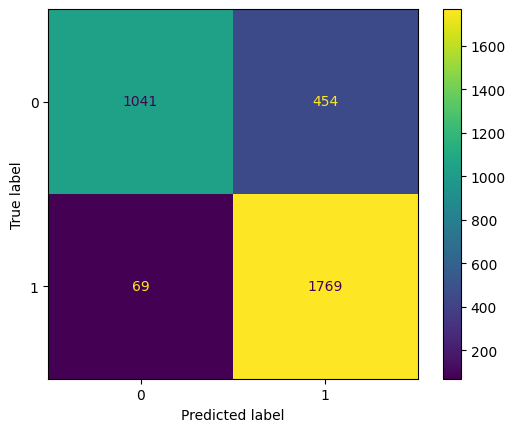

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [34]:
base = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=4, max_features=20)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.05)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=20,
                                                         min_samples_split=4),
                   learning_rate=0.05, n_estimators=200)

In [35]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1495
           1       0.80      0.94      0.87      1838

    accuracy                           0.84      3333
   macro avg       0.86      0.83      0.83      3333
weighted avg       0.85      0.84      0.84      3333



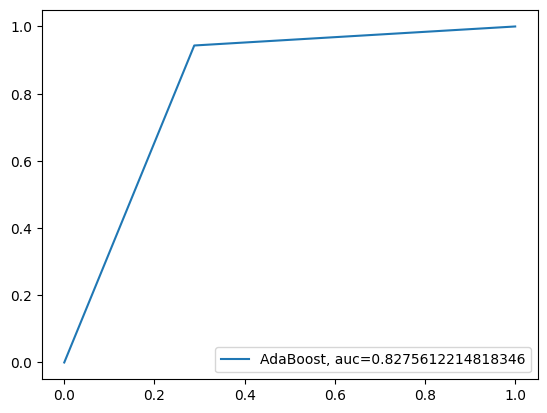

In [36]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_pred_clf)
cm

array([[1064,  431],
       [ 104, 1734]])

/home/paul/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


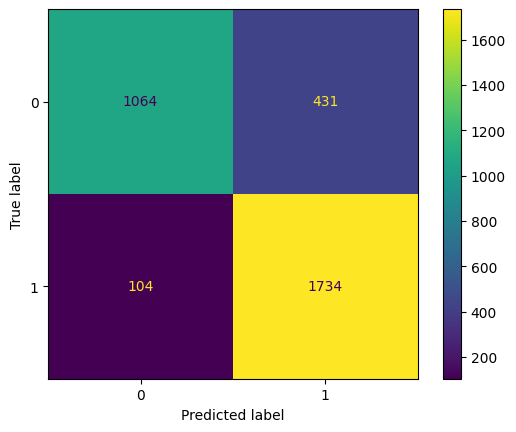

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [126]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
base = ExtraTreeClassifier(max_depth=10, min_samples_split=4)
clf = AdaBoostClassifier(n_estimators=15, base_estimator=base, learning_rate=0.01)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=ExtraTreeClassifier(max_depth=10,
                                                      min_samples_split=4),
                   learning_rate=0.01, n_estimators=15)

In [127]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1495
           1       0.80      0.96      0.87      1838

    accuracy                           0.84      3333
   macro avg       0.86      0.83      0.83      3333
weighted avg       0.86      0.84      0.84      3333



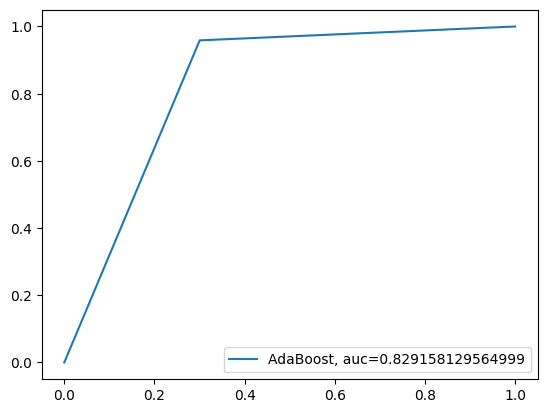

In [128]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

/home/paul/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


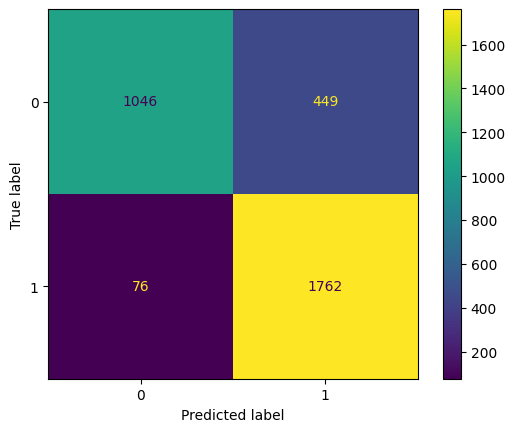

In [129]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 